
# <span style="color:rgb(213,80,0)">PDE Toolbox \- 2D Problems</span>

The general workflow for any 2D PDE problem in MATLAB follows these key steps:

1.  **Create a Model**: This is the main container for your problem.
2. **Define the Geometry**: Specify the 2D domain where the PDE is valid.
3. **Specify PDE Coefficients**: Define the specific partial differential equation you are solving.
4. **Apply Boundary Conditions**: Define what happens at the edges of your geometry.
5. **Generate a Mesh**: Discretize your geometry into small elements (usually triangles).
6. **Solve and Visualize**: Compute the solution and plot the results.

### Problem 1 \- The Poisson Equation

Poisson's equation on a unit square. This equation can describe things like steady\-state heat distribution or electrostatic potentials.

<p style="text-align:left">
   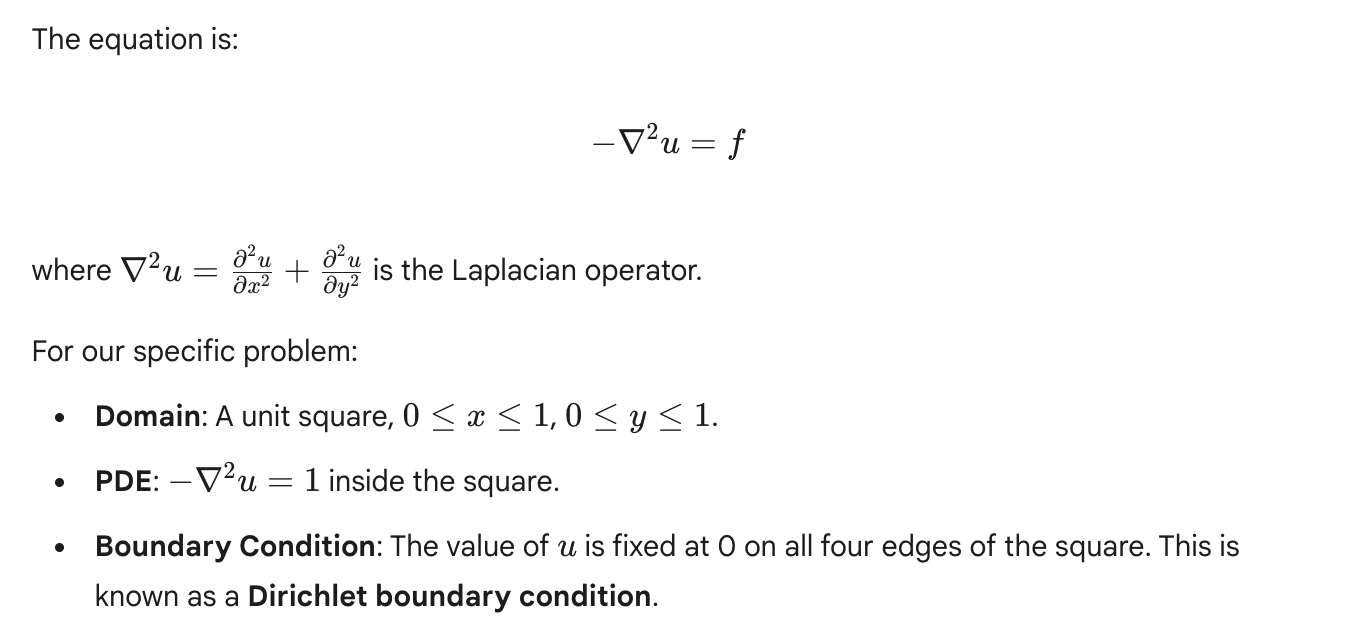
</p>


In [1]:
clc; clearvars; close all;


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  **1.Create the model.**


This is the container that will store out geometry, BCs, mesh, etc.


In [2]:
model = createpde();


 **2. Define geometry.**


We will define a simple square with corners at (0,0), (1,0), (1,1), and (0,1).


In [3]:
R1 = [3; 4; 0; 1; 1; 0; 0; 0; 1; 1]; % 3 -> rectangle, 4 -> no. of edges, and then x and y in counter-clockwise
g = decsg(R1);

% Add the geometry to our model
geometryFromEdges(model, g);


We can also plot the geometry to check it.



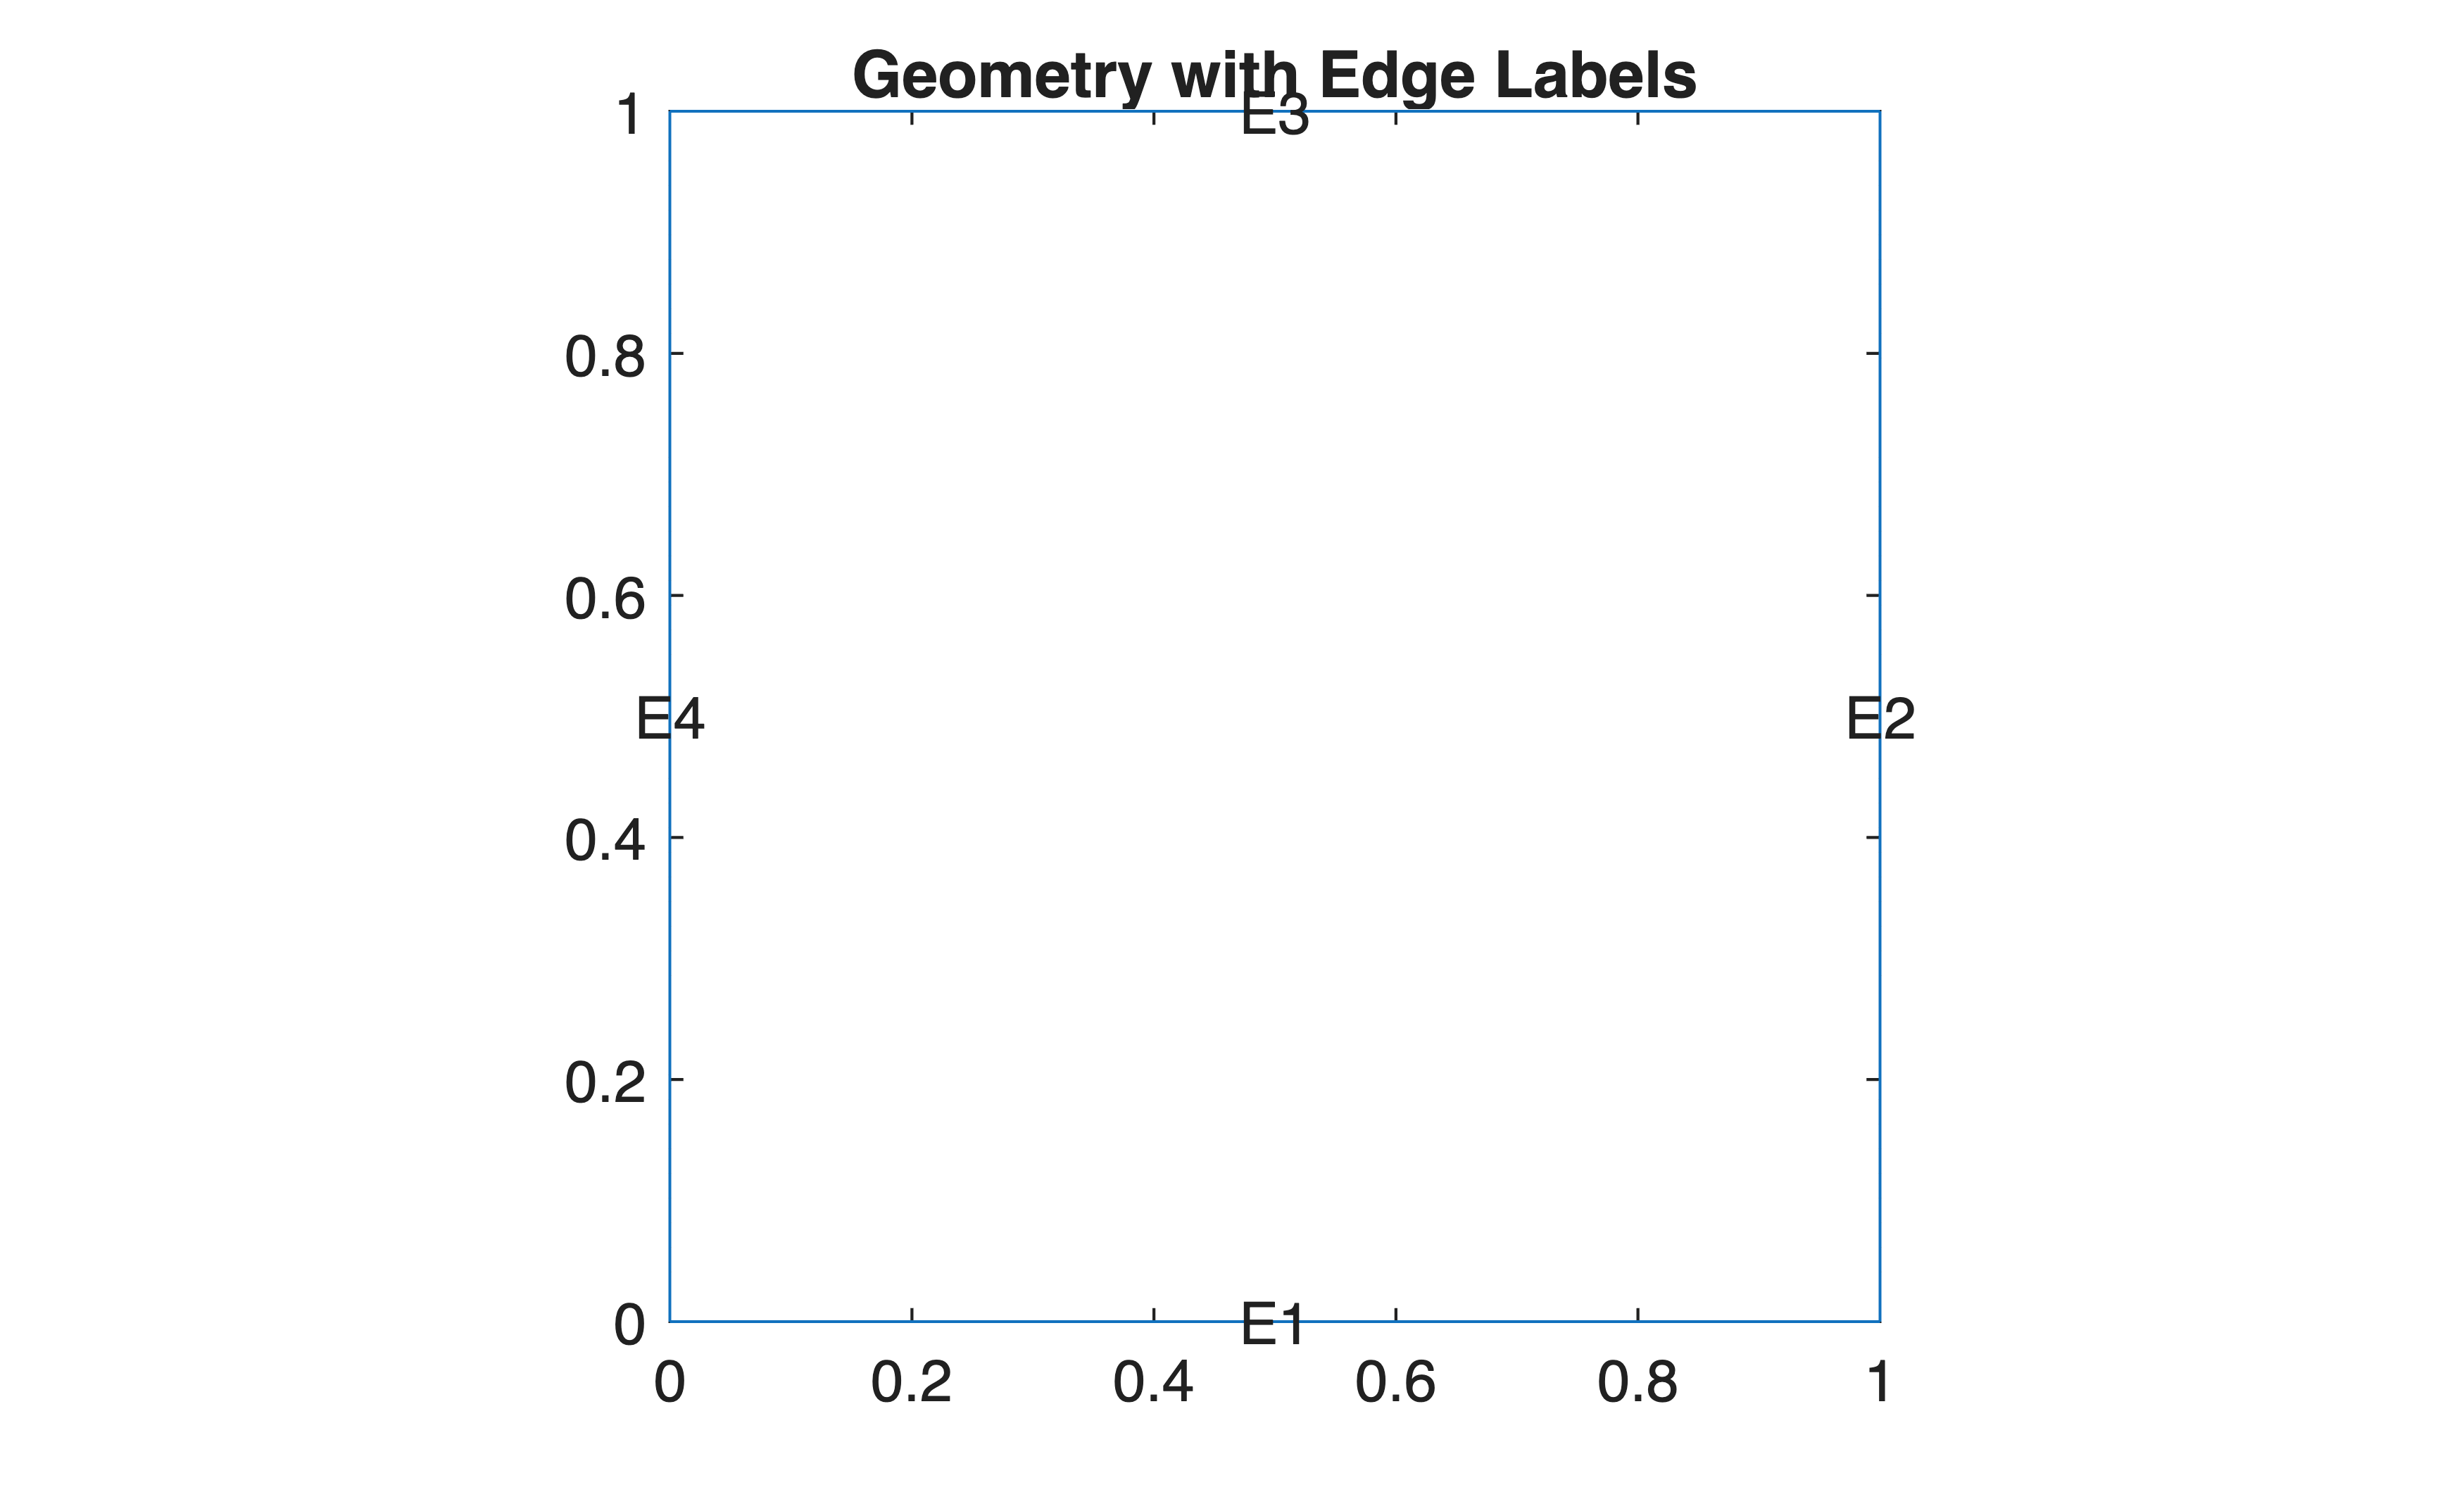

In [4]:
figure;
pdegplot(model, 'EdgeLabels', 'on'); % Edgelabels are useful to apply BCs later on.
title('Geometry with Edge Labels');
axis equal;


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  **3. Specify PDE Coefficients**


The toolbox solves PDEs in a general form:

<p style="text-align:left">
   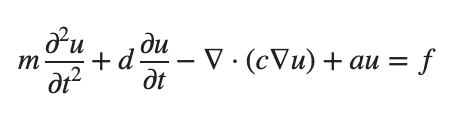
</p>


In our equation, m=0, d=0, c=1, a=0, f=1


So we specify these coefficients


In [5]:
specifyCoefficients(model, 'm', 0, 'd', 0, 'c', 1, 'a', 0, 'f', 1);


&nbsp;&nbsp;&nbsp;&nbsp;  **4. Apply Boundary conditions**


We want u = 0 on all boundaries (edges 1, 2, 3, and 4). This is called Dirichlet BC.


In [6]:
applyBoundaryCondition(model, ...
                       'dirichlet', ... % Type of condition
                       'Edge', 1:4, ... % Apply to all 4 edges
                       'u', 0);       % The value of u is 0


 **5. Generate Mesh**


'Hmax' controls the maximum element edge length (smaller = more accurate but slower).


In [7]:
generateMesh(model, 'Hmax', 0.05);


We can also plot the mesh to see it.



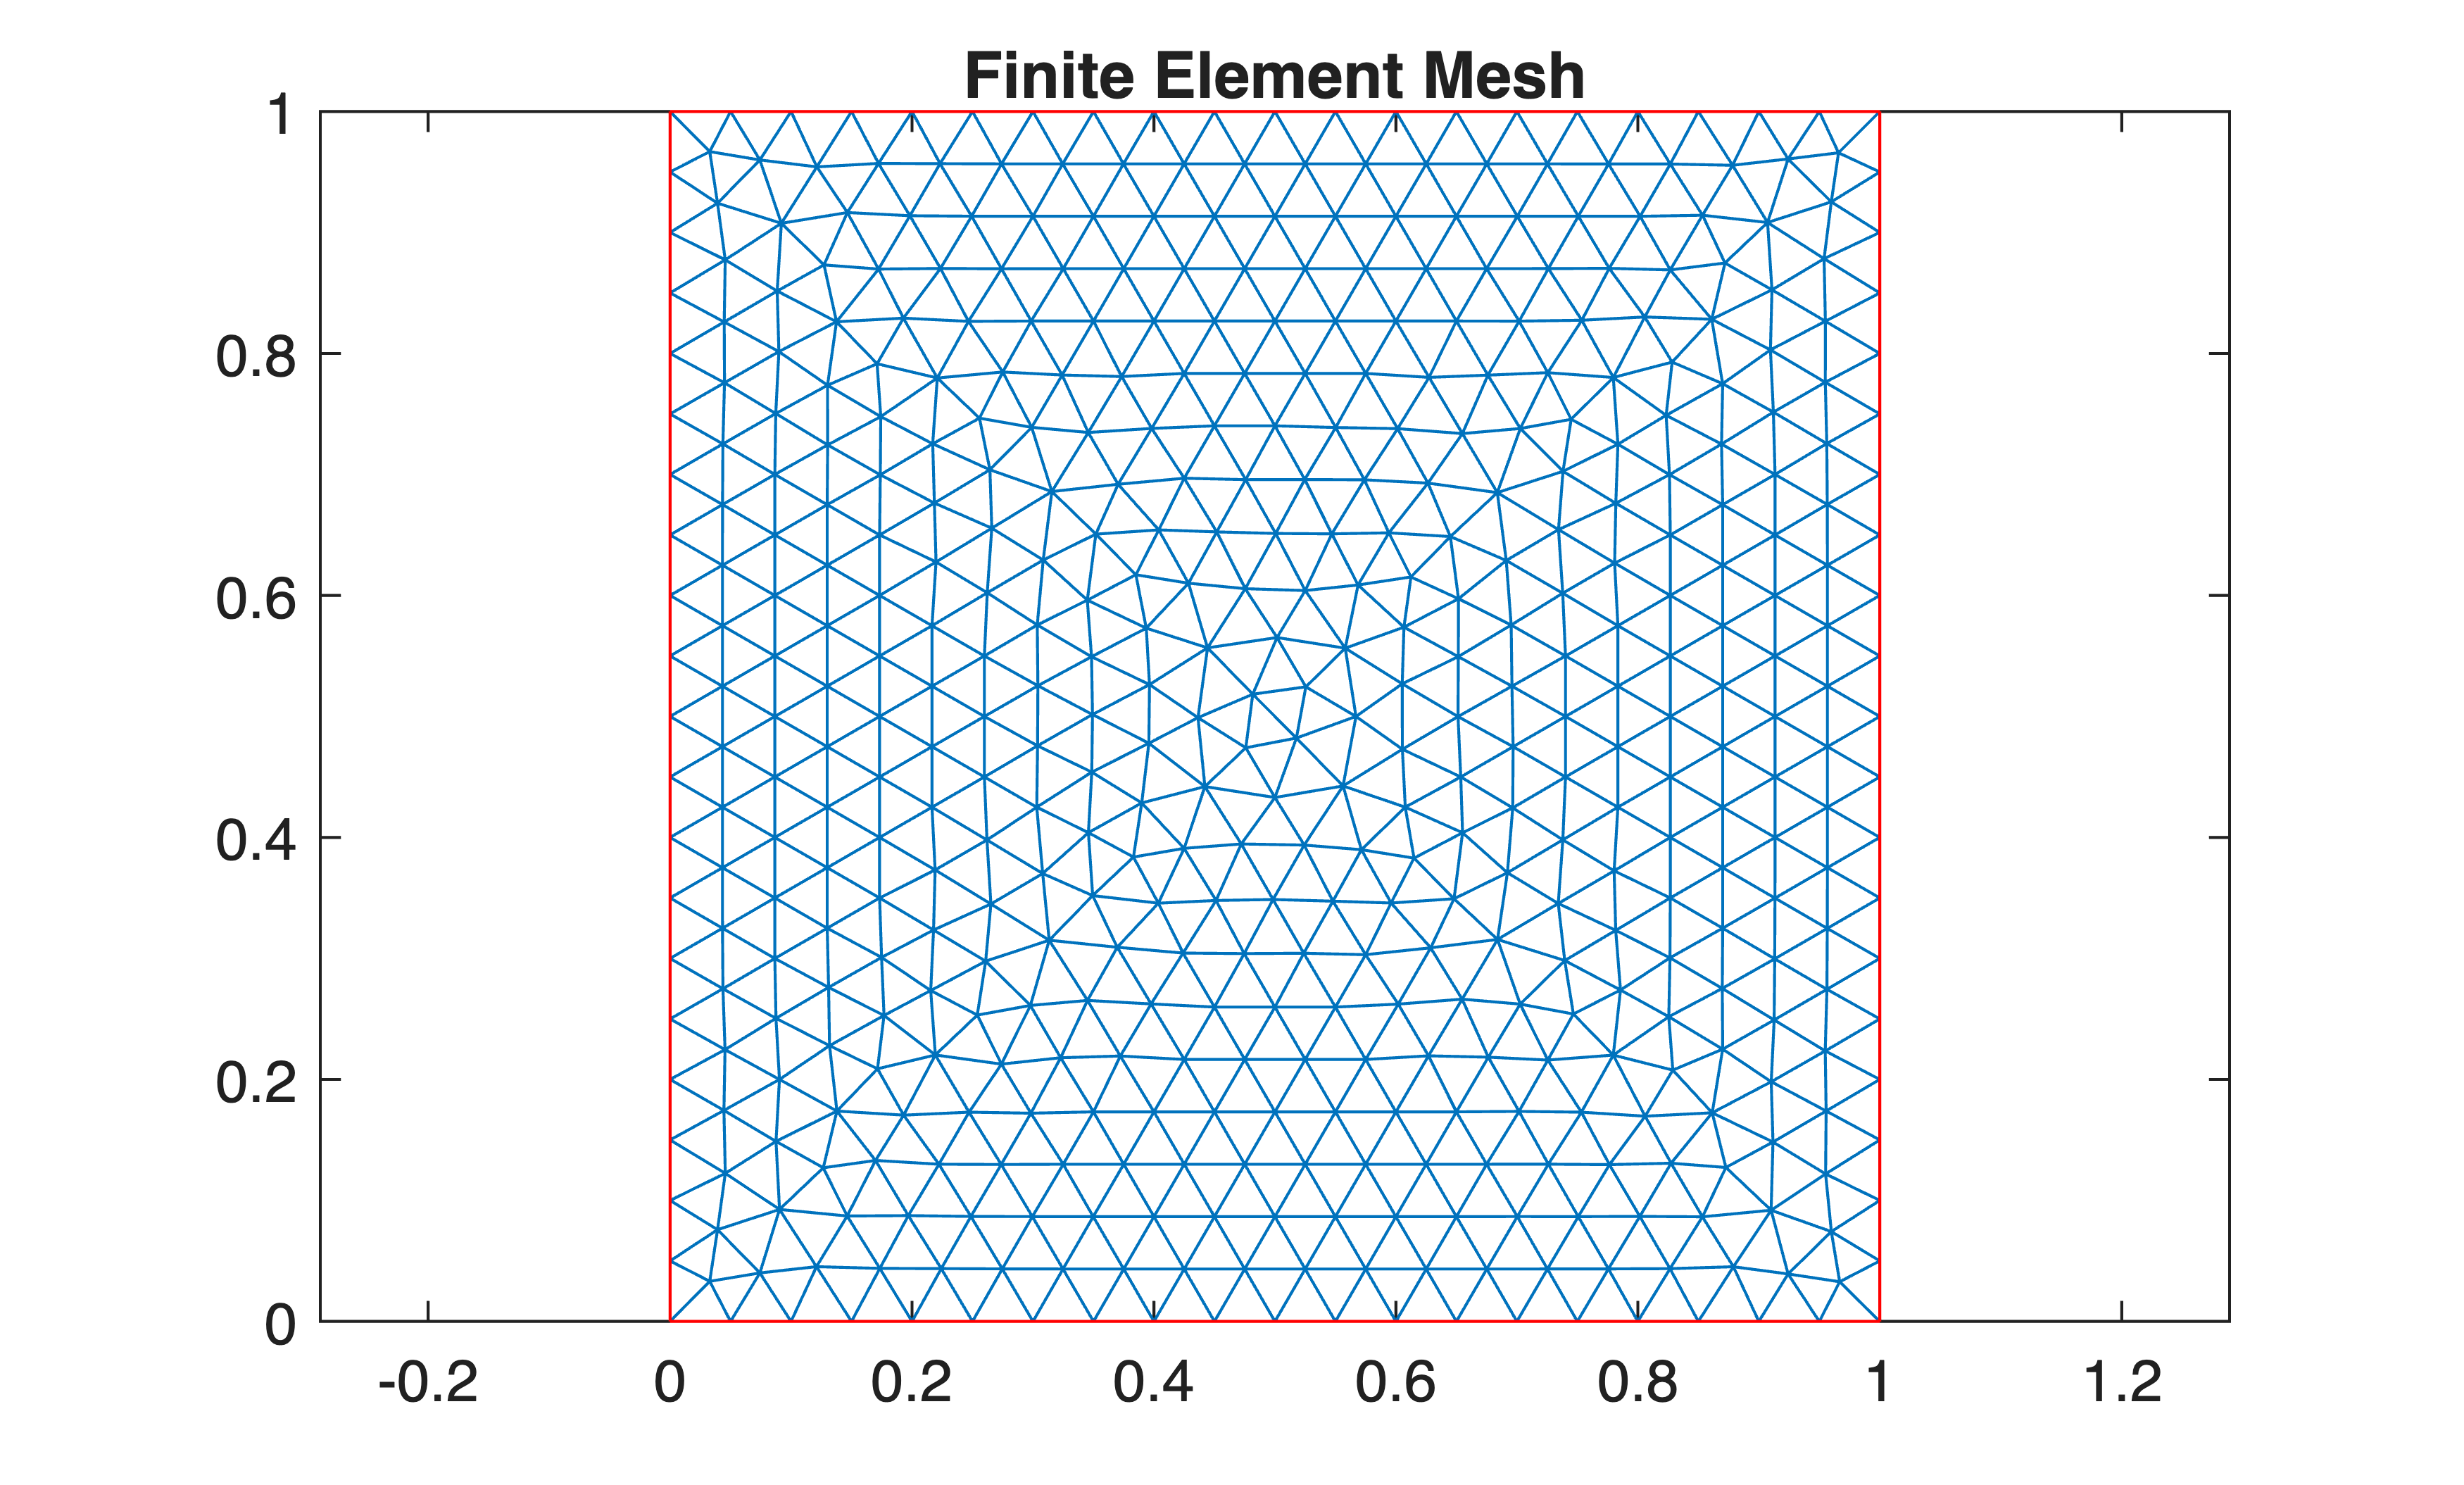

In [8]:
figure;
pdemesh(model);
title('Finite Element Mesh');
axis equal;


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  **6. Solve PDE**


It assembles and solves the linear system derived from the PDE and mesh.


It returns a results object containing the solution at the mesh nodes.


In [9]:
results = solvepde(model);
u = results.NodalSolution;


Finally plot the solution



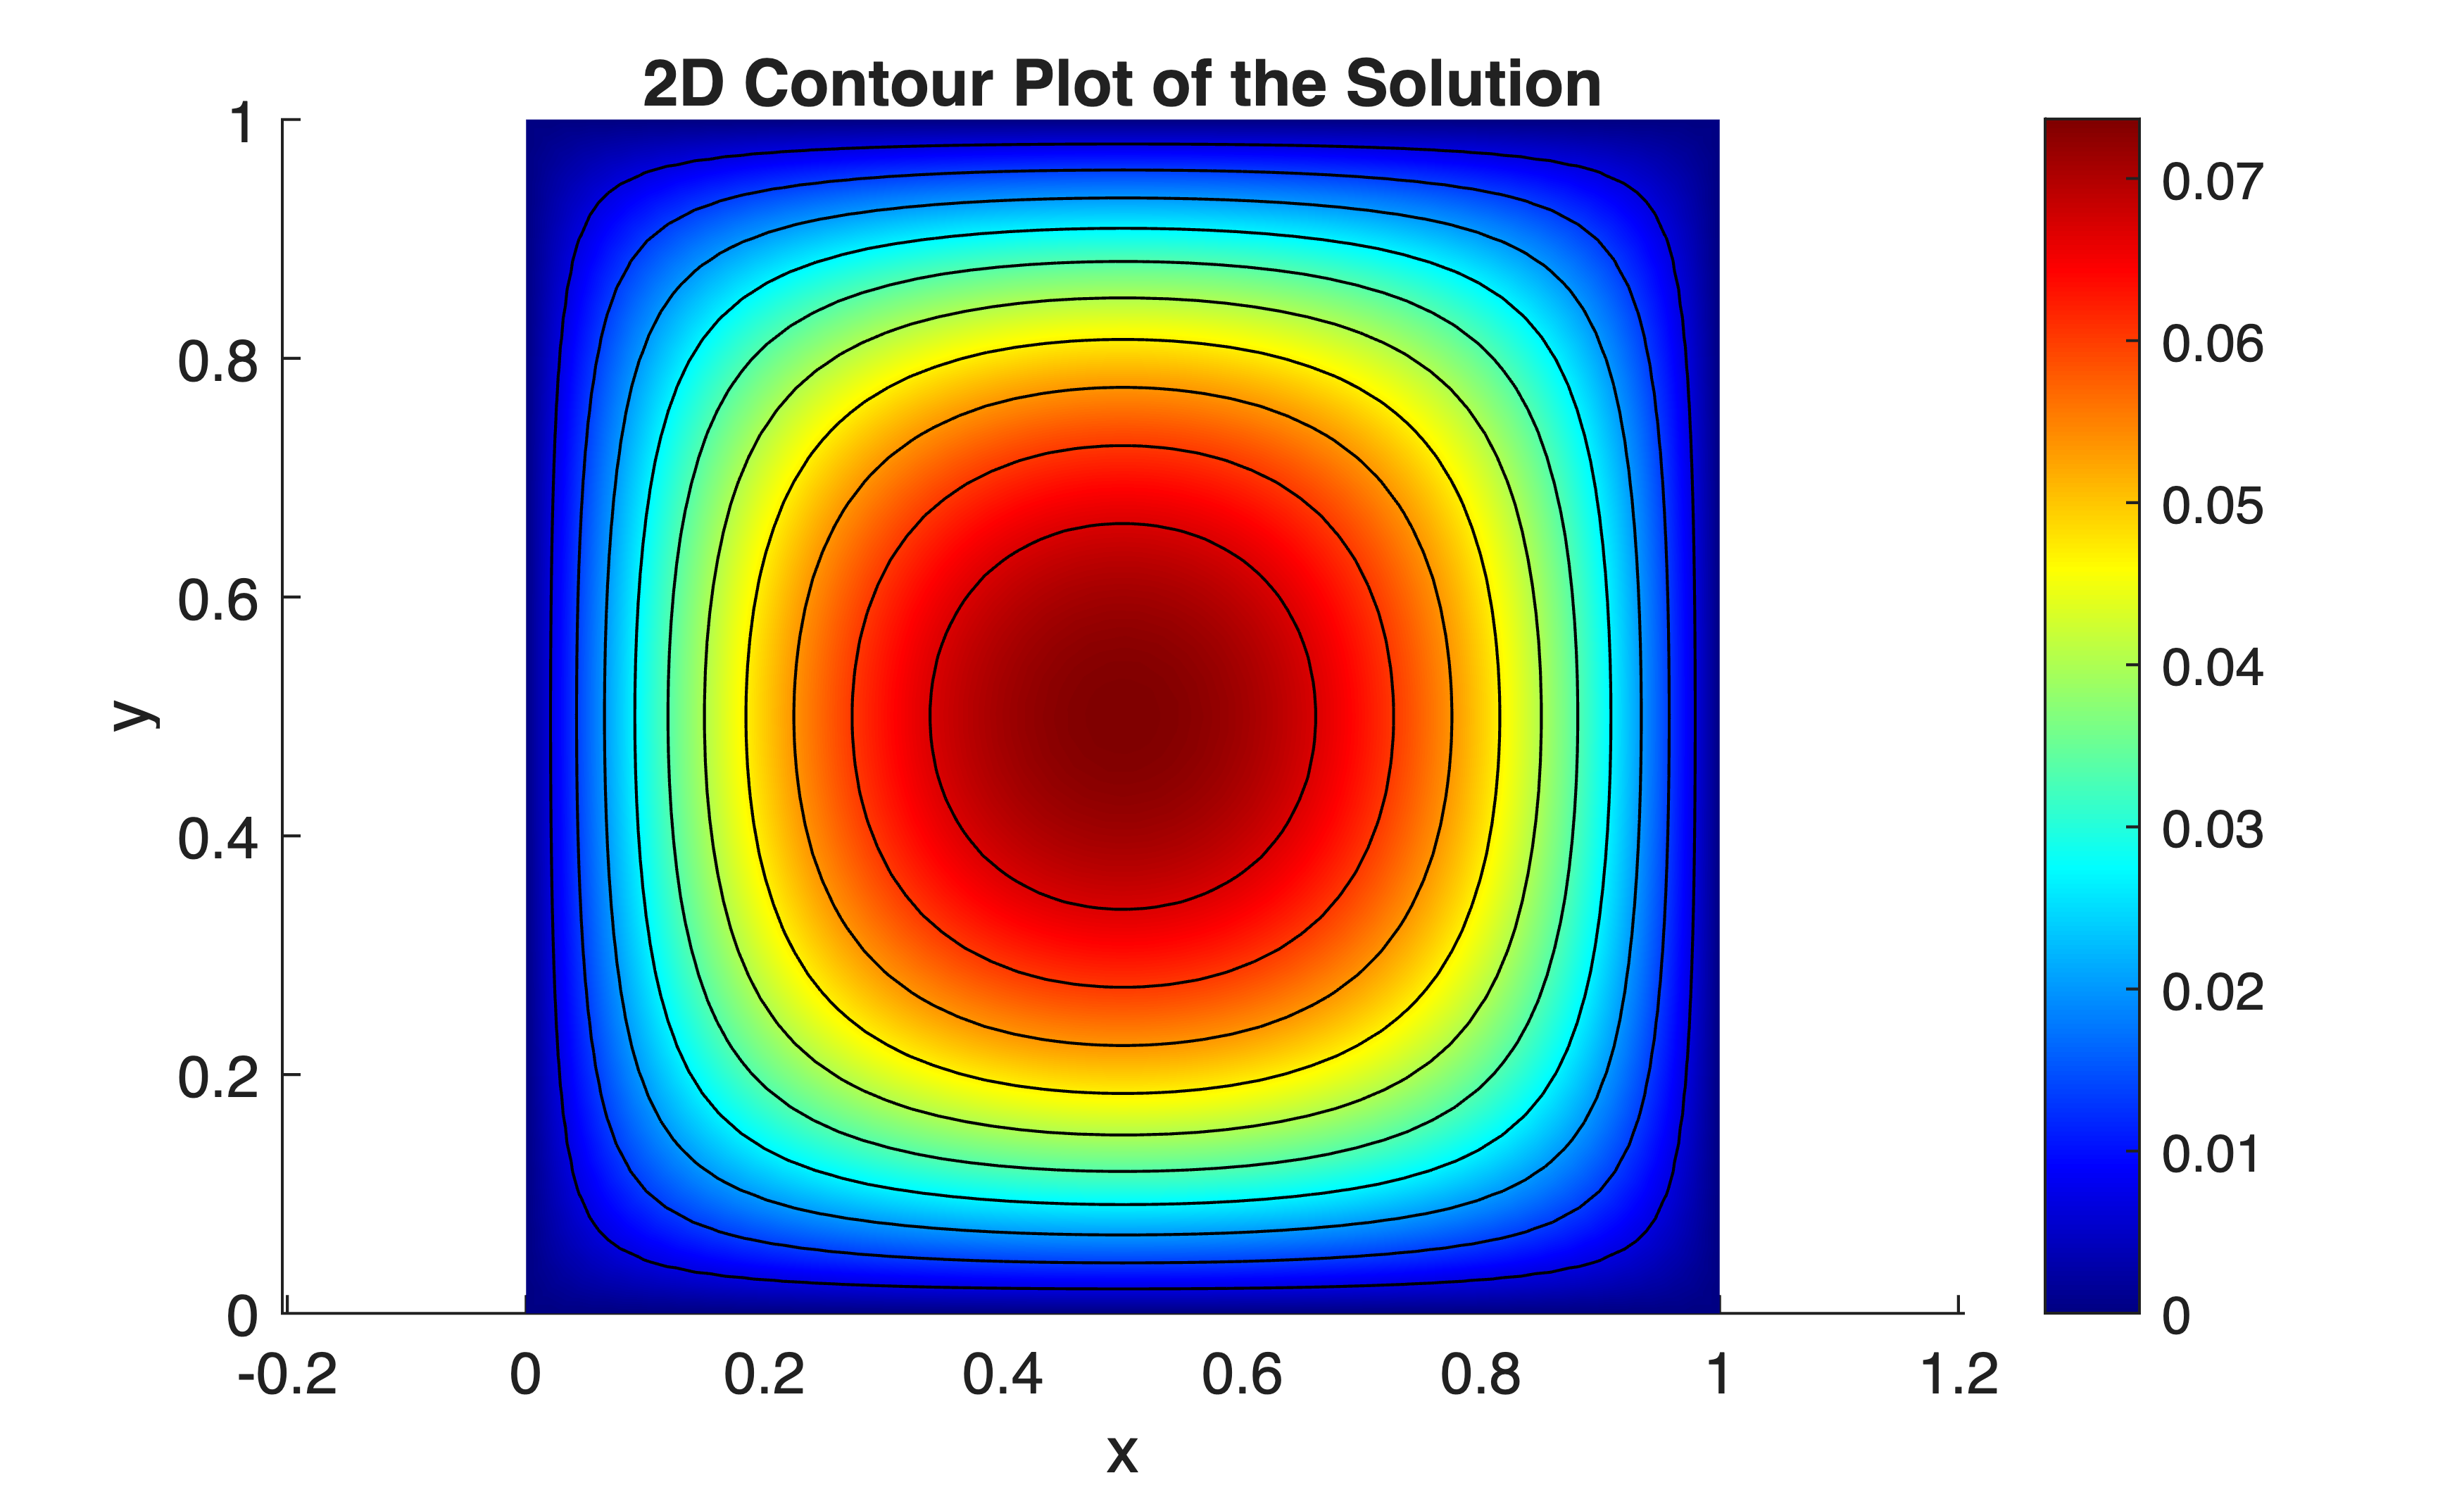

In [10]:
% Create a 2D contour plot
figure;
pdeplot(model, 'XYData', u, 'Contour', 'on', 'ColorMap', 'jet');
title('2D Contour Plot of the Solution');
xlabel('x');
ylabel('y');
axis equal;